In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

print("PyTorch version:[%s]." % (torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:[%s].' % (device))

PyTorch version:[1.7.1].
device:[cpu].


In [2]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root='./data/', train=True,
                             transform=transforms.ToTensor(),
                             download=True)
mnist_test = datasets.MNIST(root='./data/', train=False,
                            transform=transforms.ToTensor(),
                            download=True)

print('mnist_train:\n', mnist_train, '\n')
print('mnist_test:\n', mnist_test, '\n')
print('Done.')

0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


/Users/junyun/miniconda3/envs/boostcamp/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=BATCH_SIZE,
                                        shuffle=True, num_workers=1)
print('Done.')

Done.


In [4]:
class MultiLayerPerceptronClass(nn.Module):
    
    def __init__(self, name='mlp', xdim=784, hdim=256, ydim=10):
        super(MultiLayerPerceptronClass, self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.lin_1 = nn.Linear(self.xdim, self.hdim)
        self.lin_2 = nn.Linear(self.hdim, self.ydim)
        self.init_param()
        
    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)
        
    def forward(self, x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net)
        return net
    

M = MultiLayerPerceptronClass().to(device)
loss = nn.CrossEntropyLoss()
optm = optim.Adam(M.parameters(), lr=1e-3)
print('Done.')

Done.


In [7]:
x_numpy = np.random.rand(2,784)
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch)
y_numpy = y_torch.detach().cpu().numpy()
print('x_numpy:\n', x_numpy)
print('x_torch:\n', x_torch)
print('y_numpy:\n', y_numpy)
print('y_torch:\n', y_torch)

x_numpy:
 [[0.83140954 0.42313279 0.16692963 ... 0.65983391 0.79501392 0.92892332]
 [0.27840975 0.0157468  0.39008997 ... 0.86542812 0.56059916 0.29165262]]
x_torch:
 tensor([[0.8314, 0.4231, 0.1669,  ..., 0.6598, 0.7950, 0.9289],
        [0.2784, 0.0157, 0.3901,  ..., 0.8654, 0.5606, 0.2917]])
y_numpy:
 [[ 0.34105998 -0.8885688   0.48225087  1.0050977   0.21888046  0.39247447
   0.3111878  -0.07598683  0.08612835 -0.20719811]
 [-0.38350615 -0.8814891  -0.13781187  0.5543524  -0.44071674  1.0001659
  -0.02410066 -0.15840352  0.7614591  -1.6759697 ]]
y_torch:
 tensor([[ 0.3411, -0.8886,  0.4823,  1.0051,  0.2189,  0.3925,  0.3112, -0.0760,
          0.0861, -0.2072],
        [-0.3835, -0.8815, -0.1378,  0.5544, -0.4407,  1.0002, -0.0241, -0.1584,
          0.7615, -1.6760]], grad_fn=<AddmmBackward>)


In [11]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx, (param_name, param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print('[%d] name:[%s] shape:[%s].' % (p_idx, param_name, param_numpy.shape))
    print('    val:%s' % (param_numpy.reshape(-1)[:5]))

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[-0.038 -0.052 -0.111 -0.003 -0.019]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[ 0.106 -0.074  0.094  0.03  -0.059]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]


In [33]:
torch.max(torch.tensor([[0.7, 0.3, 0.1],
                        [0.8, 0.2, 0.9]]))

tensor(0.9000)

In [34]:
torch.max(torch.tensor([[0.7, 0.3, 0.1],
                        [0.8, 0.2, 0.9]]), 0)

torch.return_types.max(
values=tensor([0.8000, 0.3000, 0.9000]),
indices=tensor([1, 0, 1]))

In [30]:
torch.max(torch.tensor([[0.7, 0.3, 0.1],
                        [0.8, 0.2, 0.9]]), 0)[1]

tensor([1, 0, 1])

In [31]:
torch.max(torch.tensor([[0.7, 0.3, 0.1],
                        [0.8, 0.2, 0.9]]), 1)[1]

tensor([0, 2])

In [35]:
def func_eval(model, data_iter, device):
    with torch.no_grad():
        model.eval()
        n_total, n_correct = 0, 0
        for batch_in, batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(batch_in.view(-1, 28*28).to(device))
            _, y_pred = torch.max(model_pred.data, 1)
            n_correct += (y_pred == y_trgt).sum().item()
            n_total += batch_in.size(0)
        val_acc = (n_correct / n_total)
        model.train()
    return val_acc
print('Done.')

Done.


In [37]:
M.init_param()
train_acc = func_eval(M, train_iter, device)
test_acc = func_eval(M, test_iter, device)
print('train_acc: [%.3f] test_acc: [%.3f].' % (train_acc, test_acc))

train_acc: [0.080] test_acc: [0.088].


In [38]:
print('Start training.')
M.init_param()
M.train()
EPOCHS, print_every = 10, 1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in, batch_out in train_iter:
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss_out = loss(y_pred, batch_out.to(device))
        optm.zero_grad()
        loss_out.backward()
        optm.step()
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum / len(train_iter)
    
    if ((epoch % print_every) == 0) or (epoch == (EPOCHS - 1)):
        train_acc = func_eval(M, train_iter, device)
        test_acc = func_eval(M, test_iter, device)
        print('epoch:[%d] loss[%.3f] train_acc:[%.3f] test_acc:[%.3f].'
              % (epoch, loss_val_avg, train_acc, test_acc))
print('Done.')

Start training.
epoch:[0] loss[0.379] train_acc:[0.945] test_acc:[0.944].
epoch:[1] loss[0.167] train_acc:[0.963] test_acc:[0.960].
epoch:[2] loss[0.120] train_acc:[0.973] test_acc:[0.967].
epoch:[3] loss[0.092] train_acc:[0.980] test_acc:[0.973].
epoch:[4] loss[0.072] train_acc:[0.984] test_acc:[0.975].
epoch:[5] loss[0.058] train_acc:[0.988] test_acc:[0.976].
epoch:[6] loss[0.048] train_acc:[0.991] test_acc:[0.978].
epoch:[7] loss[0.040] train_acc:[0.992] test_acc:[0.977].
epoch:[8] loss[0.033] train_acc:[0.994] test_acc:[0.978].
epoch:[9] loss[0.028] train_acc:[0.995] test_acc:[0.978].
Done.


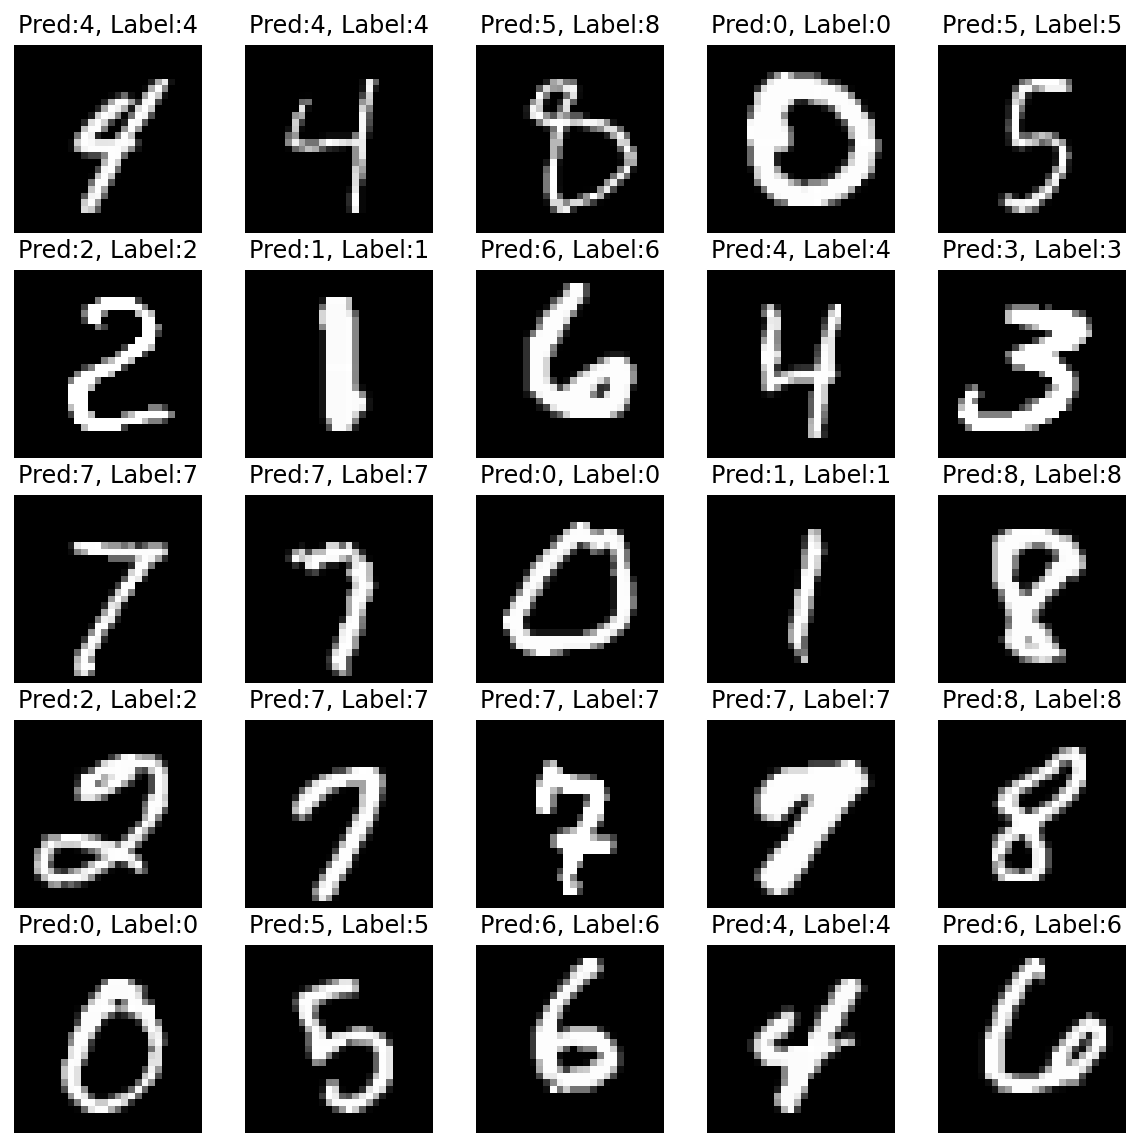

Done.


In [39]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title('Pred:%d, Label:%d' % (y_pred[idx], test_y[idx]))
plt.show()
print('Done.')